## Feature Engineering Benchmark: Vectorization (BoW vs TF-IDF) Across N-Gram Ranges


In [2]:
import mlflow
import mlflow.sklearn
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.ensemble                import RandomForestClassifier
from mlflow.models.signature         import infer_signature
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing           import StandardScaler
from sklearn.model_selection         import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics                 import *

In [3]:
df = pd.read_csv('preprocessed_corpus.csv')
df.head()

,raw_comment,category,word_count_raw,char_count_raw,num_unique_words,num_upper_words,num_punctuation_raw,cleaned_comment,num_stop_words,processed_comment,final_word_count,final_char_count
0,family mormon have never tried explain them t...,1,39,261,34,0,0,family mormon have never tried explain them th...,13,family mormon never tried explain still stare ...,26,171
1,buddhism has very much lot compatible with chr...,1,196,1269,136,0,0,buddhism has very much lot compatible with chr...,56,buddhism much lot compatible christianity espe...,140,842
2,seriously don say thing first all they won get...,-1,86,460,67,0,0,seriously don say thing first all they won get...,40,seriously say thing first get complex explain ...,46,230
3,what you have learned yours and only yours wha...,0,29,168,24,0,0,what you have learned yours and only yours wha...,14,learned want teach different focus goal not wr...,15,87
4,for your own benefit you may want read living ...,1,112,691,82,0,0,for your own benefit you may want read living ...,46,benefit may want read living buddha living chr...,66,397


In [4]:
# Step 2: Set up the MLflow tracking server
mlflow.set_tracking_uri("http://ec2-13-201-96-130.ap-south-1.compute.amazonaws.com:5000/")

In [5]:
# # create an experiment 
# mlflow.create_experiment(
#                             name              = "Experiment_2_BoW_Vs_TfIdf",
#                             artifact_location = "s3://mlflow-s3-25/Experiment_2_BoW_Vs_TfIdf"
#                         )

In [6]:
# set an experiment
mlflow.set_experiment("Experiment_2_BoW_Vs_TfIdf")

<Experiment: artifact_location='s3://mlflow-s3-25/Experiment_2_BoW_Vs_TfIdf', creation_time=1756895903261, experiment_id='310750135174482726', last_update_time=1756895903261, lifecycle_stage='active', name='Experiment_2_BoW_Vs_TfIdf', tags={}>

Evaluation Metrics_BoW_(1, 1) : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.64    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.94    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.75    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.55    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.49    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each class metric by its s

Evaluation Metrics_TF-IDF_(1, 1) : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.64    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.93    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.74    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.55    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.49    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each class metric by it

Evaluation Metrics_BoW_(1, 2) : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.64    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.94    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.75    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.55    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.49    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each class metric by its s

Evaluation Metrics_TF-IDF_(1, 2) : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.64    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.94    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.74    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.55    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.49    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each class metric by it

Evaluation Metrics_BoW_(1, 3) : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.64    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.94    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.74    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.55    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.49    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each class metric by its s

Evaluation Metrics_TF-IDF_(1, 3) : (values close to 1 represent the GOOD Model)

	Accuracy     : 0.64    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions
	Log Loss     : 0.93    --> Measures the performance of a classification model, Less is Good
	Macro  		       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics
	  Precision  : 0.75    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions 
	  Recall     : 0.55    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.
	  F1-Score   : 0.49    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences
	  ROC-AUC    : 0.84    --> Measures the ability of the model to distinguish between classes.
	Weighted  	       --> Weighted average    : Accounts for class imbalance by weighting each class metric by it

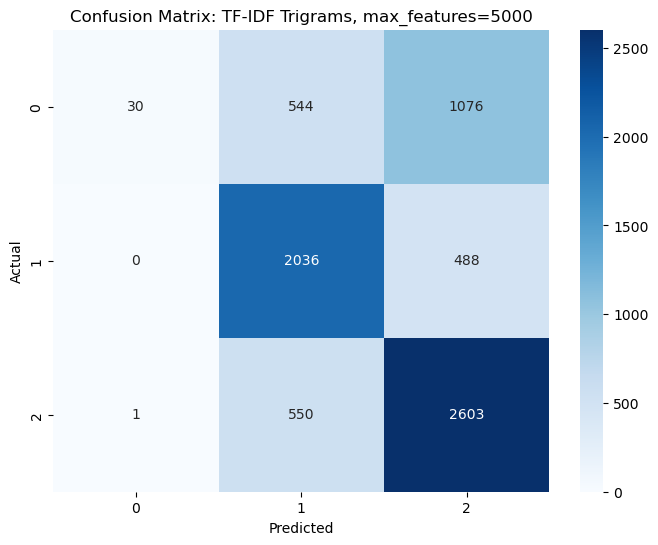

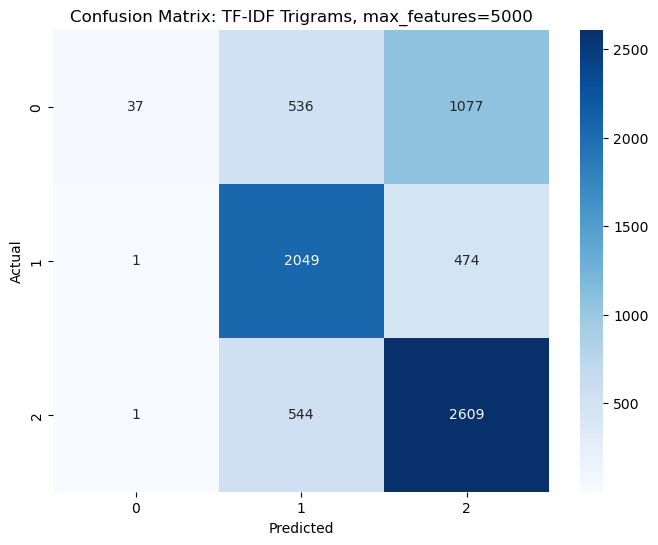

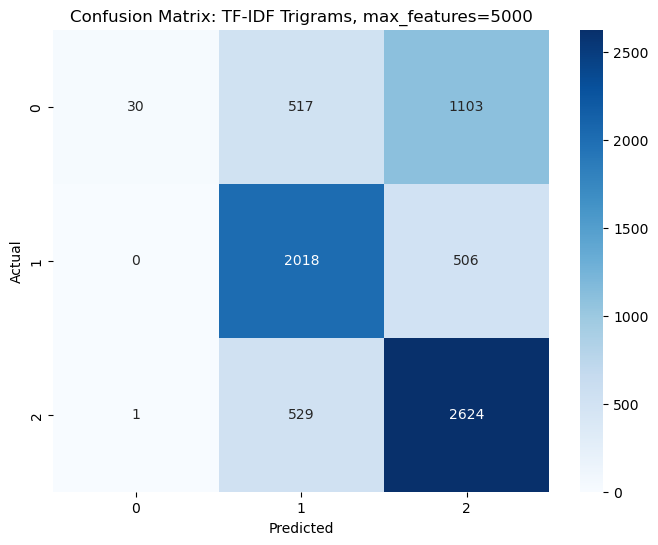

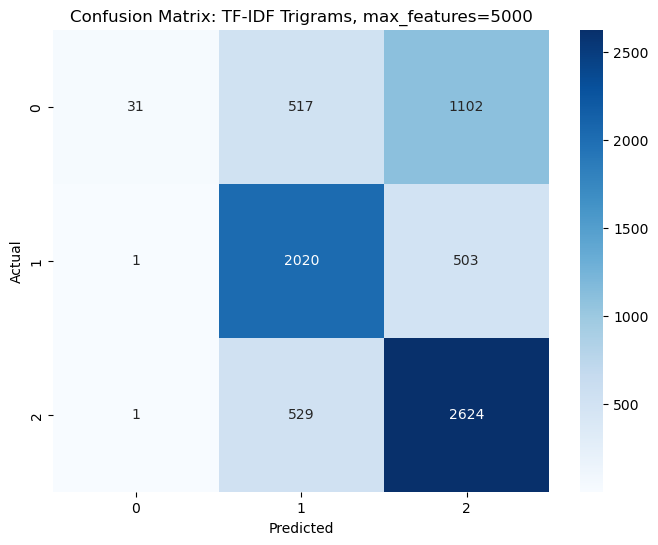

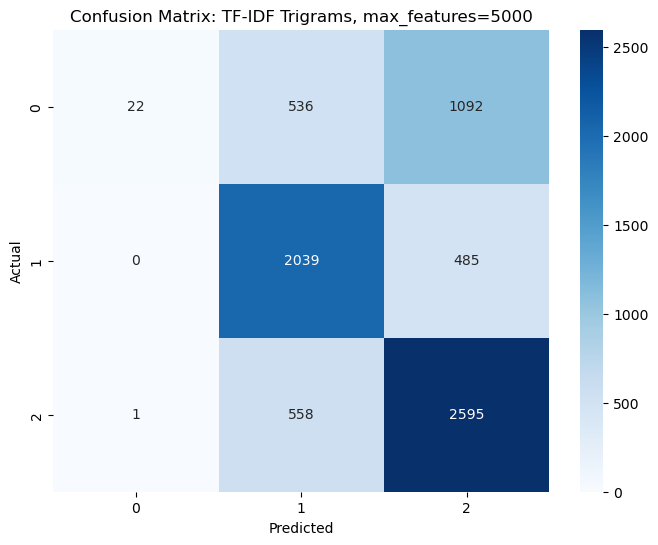

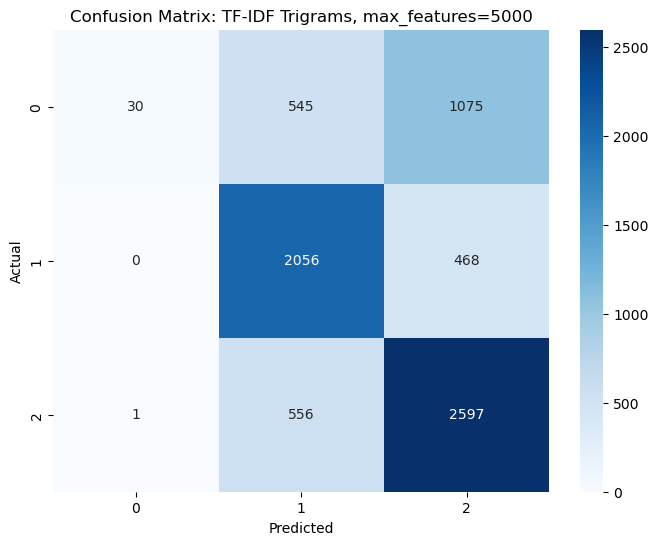

In [7]:
# Step 1 :Function to run the experiment
def run_experiment(vectorizer_type, ngram_range, vectorizer_max_features, vectorizer_name):
    # Step 2: Vectorization slection
    if  vectorizer_type == "BoW":
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)
    else:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=vectorizer_max_features)

    # Step 3 : split the data and transform
    X_train, X_test, y_train, y_test = train_test_split(df['processed_comment'], df['category'], test_size=0.2, random_state=42, stratify=df['category'])

    X_train = vectorizer.fit_transform(X_train)
    X_test  = vectorizer.transform    (X_test)

    # Step 4: Define and train a Random Forest model
    with mlflow.start_run() as run:
        # Set tags for the experiment and run
        mlflow.set_tag("mlflow.runName",  f"{vectorizer_name}_{ngram_range}_RandomForest")
        mlflow.set_tag("experiment_type", "feature_engineering")
        mlflow.set_tag("model_type",      "RandomForestClassifier")

        # Add a description
        mlflow.set_tag("description", f"RandomForest with {vectorizer_name}, ngram_range={ngram_range}, max_features={vectorizer_max_features}")

        # Log vectorizer parameters
        mlflow.log_param("vectorizer_type",         vectorizer_type)
        mlflow.log_param("ngram_range",             ngram_range)
        mlflow.log_param("vectorizer_max_features", vectorizer_max_features)

        # Log Random Forest parameters
        n_estimators   = 200
        max_depth      = 15

        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth",  max_depth)

        # Initialize and train the model
        model          = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        # Step 5: Make predictions and log metrics
        y_pred         = model.predict(X_test)

        # Step 1: Compute Evaluation Metrics
        accuracy           = accuracy_score       (y_test, y_pred)
        
        macro_precision    = precision_score      (y_test, y_pred, average='macro')
        macro_recall       = recall_score         (y_test, y_pred, average='macro')         # Recall or Sensitivity
        macro_F1_score     = f1_score             (y_test, y_pred, average='macro')
        macro_roc_auc      = roc_auc_score        (y_test, model.predict_proba(X_test), average='macro', multi_class='ovr')
        weighted_precision = precision_score      (y_test, y_pred, average='weighted')
        weighted_recall    = recall_score         (y_test, y_pred, average='weighted')         # Recall or Sensitivity
        weighted_F1_score  = f1_score             (y_test, y_pred, average='weighted')
        weighted_roc_auc   = roc_auc_score        (y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')
        
        log_loss_value     = log_loss             (y_test, model.predict_proba(X_test))
        cm                 = confusion_matrix     (y_test,y_pred)
        cr                 = classification_report(y_test, y_pred)
        
        # Step 7: Log Class-wise Metrics from Classification Report
        classification_rep = classification_report(y_test, y_pred, output_dict=True)

        for label, metrics in classification_rep.items():
            clean_label = label.replace(" avg", "")  # Remove " avg" from label if present
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{clean_label}_{metric}", value)
            else:
                mlflow.log_metric(f"{clean_label}", metrics)

        # Step 6: Log Remaining Metrics to MLflow
        mlflow.log_metric("log_loss",         log_loss_value)        
        mlflow.log_metric("macro_roc_auc",    macro_roc_auc)
        mlflow.log_metric("weighted_roc_auc", weighted_roc_auc)
        
        # Step 8: Plot and Log Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix: TF-IDF Trigrams, max_features={max_features}")
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
    
        # Step 9: saving and logging the dataset
        df.to_csv("dataset.csv", index=False)
        mlflow.log_artifact("dataset.csv")
        
        # Step 10: Log Model and Dataset
        input_example = X_test[:5]                                       # input_example provides a sample input for the model, 
                                                                         # useful for UI display and validation
        signature     = infer_signature(X_train, model.predict(X_train)) # signature defines the expected input/output schema of the model, 
                                                                         # enabling reproducibility and serving
        
        mlflow.sklearn.log_model(
                                    sk_model      = model,
                                    name          = f"RF_model_{vectorizer_name}_{ngram_range}",
                                    input_example = input_example,
                                    signature     = signature
                                ) 
        # Step 11: Print Evaluation Summary
        print(f"\033[1m\033[4mEvaluation Metrics_{vectorizer_name}_{ngram_range}\033[0m : (values close to 1 represent the GOOD Model)\n")
        print(f'\tAccuracy     : {accuracy:.2f}    --> [TP + TN]/ALL       : The proportion of correctly predicted observations over total predictions')
        print(f'\tLog Loss     : {log_loss_value:.2f}    --> Measures the performance of a classification model, Less is Good')
        print(f'\t\033[1m\033[4mMacro\033[0m  \t\t       --> Macro average       : Treats all classes equally by computing the unweighted mean of per-class metrics')
        print(f'\t  Precision  : {macro_precision:.2f}    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions ')
        print(f'\t  Recall     : {macro_recall:.2f}    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.')
        print(f'\t  F1-Score   : {macro_F1_score:.2f}    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences')
        print(f'\t  ROC-AUC    : {macro_roc_auc:.2f}    --> Measures the ability of the model to distinguish between classes.')
        
        print(f'\t\033[1m\033[4mWeighted\033[0m  \t       --> Weighted average    : Accounts for class imbalance by weighting each class metric by its support')
        print(f'\t  Precision  : {weighted_precision:.2f}    --> [TP]     /[TP + FP] : The proportion of true positive predictions over total positive predictions ')
        print(f'\t  Recall     : {weighted_recall:.2f}    --> [TP]     /[TP + FN] : The proportion of true positive predictions over total actual positives.')
        print(f'\t  F1-Score   : {weighted_F1_score:.2f}    --> The harmonic mean of precision and recall, useful when FP and FN both have serious consequences')
        print(f'\t  ROC-AUC    : {weighted_roc_auc:.2f}    --> Measures the ability of the model to distinguish between classes.')
        
        
        print(f'\nConfusion Matix      :         -->    \033[1m\033[4mORIGINAL\033[0m     \t\t\033[1m\033[4mSTANDARD\033[0m\n')
        def format_row(row):
            formatted = ' '.join(f"{val:>2}" for val in row)
            return f"[{formatted}]"
        
        for row1, row2 in zip(cm, np.flip(cm)):
            print("\t\t\t\t  ", format_row(row1), "\t       ", format_row(row2))
        
        print("\nClassification Rpt   :")
        print('\n'.join('\t\t\t\t' + line for line in cr.splitlines()))


        
# Step 6: Run experiments for BoW and TF-IDF with different n-grams
ngram_ranges = [(1, 1), (1, 2), (1, 3)]     # unigrams, bigrams, trigrams
max_features = 5000                         # Example max feature size

for ngram_range in ngram_ranges:
    # BoW Experiments
    run_experiment("BoW",    ngram_range, max_features, vectorizer_name="BoW")

    # TF-IDF Experiments
    run_experiment("TF-IDF", ngram_range, max_features, vectorizer_name="TF-IDF")
